In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SGLBO

## PQC

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


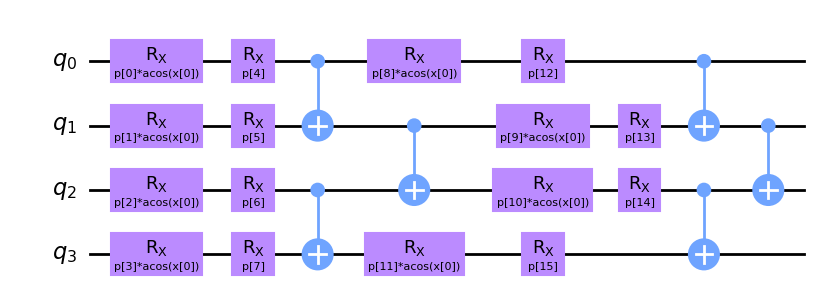

In [2]:
executor = Executor("qasm_simulator")
executor.set_shots(5000)

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

## Observable

In [3]:
op = SummedPaulis(nqubits)
print(op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


In [4]:
def sigmoid(x, a, b, c):
    return 1 / (1 + np.exp(-a * (x - b) / c))

In [5]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)

qnn_simulator_adam = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    Adam({"lr": 0.001,"log_file": "adam_sigmoid_noise_new.log", "maxiter": 300}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(-1, 1.1, 0.1)
y_train = sigmoid(x_train, 5, 0, 1)

qnn_simulator_adam.fit(x_train, y_train)

fit: 100%|██████████| 300/300 [1:41:22<00:00, 19.81s/it]

In [6]:
#x0 = [[i * 0.02] for i in range(15)]
x0 = [[1e-6], [2e-6], [3e-6], [4e-6], [5e-6], [6e-6], [7e-6], [8e-6], [9e-6], [1e-5], [2e-5], [3e-5], [4e-5], [5e-5], [6e-5], [7e-5], [8e-5], [9e-5], [1e-4], [2e-4], [3e-4], [4e-4], [5e-4], [6e-4], [7e-4], [8e-4], [9e-4], [1e-3], [2e-3], [3e-3], [4e-3], [5e-3], [6e-3], [7e-3], [8e-3], [9e-3], [1e-2], [2e-2], [3e-2], [4e-2], [5e-2], [6e-2], [7e-2], [8e-2], [9e-2], [1e-1], [2e-1]]
optimizer_options = {"bo_aqc_func": "EI", "bo_aqc_optimizer": "lbfgs", "bo_bounds": [(0.0, 0.2)], "log_file": "sglbo_sigmoid_noise_new.log",
                     "bo_n_calls": 60, "bo_x0_points": x0, "maxiter": 300}

qnn_simulator_sglbo = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    SGLBO(optimizer_options),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(-1, 1.1, 0.1)
y_train = sigmoid(x_train, 5, 0, 1)

qnn_simulator_sglbo.fit(x_train, y_train)


fit:   0%|          | 0/300 [00:00<?, ?it/s]BOP  fval:  3.721506744028698  x:  [1e-06]
BOP  fval:  3.7104969143005384  x:  [2e-06]
BOP  fval:  3.8080898849255105  x:  [3e-06]
BOP  fval:  3.576627487927864  x:  [4e-06]
BOP  fval:  3.691415660806951  x:  [5e-06]
BOP  fval:  3.675143485685944  x:  [6e-06]
BOP  fval:  3.702968706224915  x:  [7e-06]
BOP  fval:  3.7757203339319534  x:  [8e-06]
BOP  fval:  3.7343957177494453  x:  [9e-06]
BOP  fval:  3.647800236281052  x:  [1e-05]
BOP  fval:  3.7184450966871925  x:  [2e-05]
BOP  fval:  3.8244465528638303  x:  [3e-05]
BOP  fval:  3.766510075370687  x:  [4e-05]
BOP  fval:  3.6785387540458485  x:  [5e-05]
BOP  fval:  3.647646597184104  x:  [6e-05]
BOP  fval:  3.748084682306072  x:  [7e-05]
BOP  fval:  3.731004451183871  x:  [8e-05]
BOP  fval:  3.761575978178059  x:  [9e-05]
BOP  fval:  3.712957553134412  x:  [0.0001]
BOP  fval:  3.7077711799441113  x:  [0.0002]
BOP  fval:  3.65540654638575  x:  [0.0003]
BOP  fval:  3.7098582606375947  x:  [0.000

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.0787249509311213  x:  [0.2]
BOP  fval:  0.0787249509311213  x:  [0.2]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


 Iteration:  15 :  gp_minimize:  fval:  0.0787249509311213  x:  [0.2]  bounds:  [(0.0, 0.2)] 
BOP  fval:  0.07946726675268931  x:  [1e-06]
BOP  fval:  0.1068015729773169  x:  [2e-06]
BOP  fval:  0.09700129493637726  x:  [3e-06]
BOP  fval:  0.08460472761214458  x:  [4e-06]
BOP  fval:  0.08481092354498027  x:  [5e-06]
BOP  fval:  0.10828580884346452  x:  [6e-06]
BOP  fval:  0.09329672801501035  x:  [7e-06]
BOP  fval:  0.09688223497328184  x:  [8e-06]
BOP  fval:  0.07329492369040416  x:  [9e-06]
BOP  fval:  0.11250693291127312  x:  [1e-05]
BOP  fval:  0.08207483478268049  x:  [2e-05]
BOP  fval:  0.09193657379199924  x:  [3e-05]
BOP  fval:  0.08127551418284176  x:  [4e-05]
BOP  fval:  0.10708944794404973  x:  [5e-05]
BOP  fval:  0.09853897274360518  x:  [6e-05]
BOP  fval:  0.09288544907964658  x:  [7e-05]
BOP  fval:  0.09543623625126332  x:  [8e-05]
BOP  fval:  0.091672978403969  x:  [9e-05]
BOP  fval:  0.07786220507799117  x:  [0.0001]
BOP  fval:  0.09335811891281653  x:  [0.0002]
BOP  fv

## predict vs. actual function

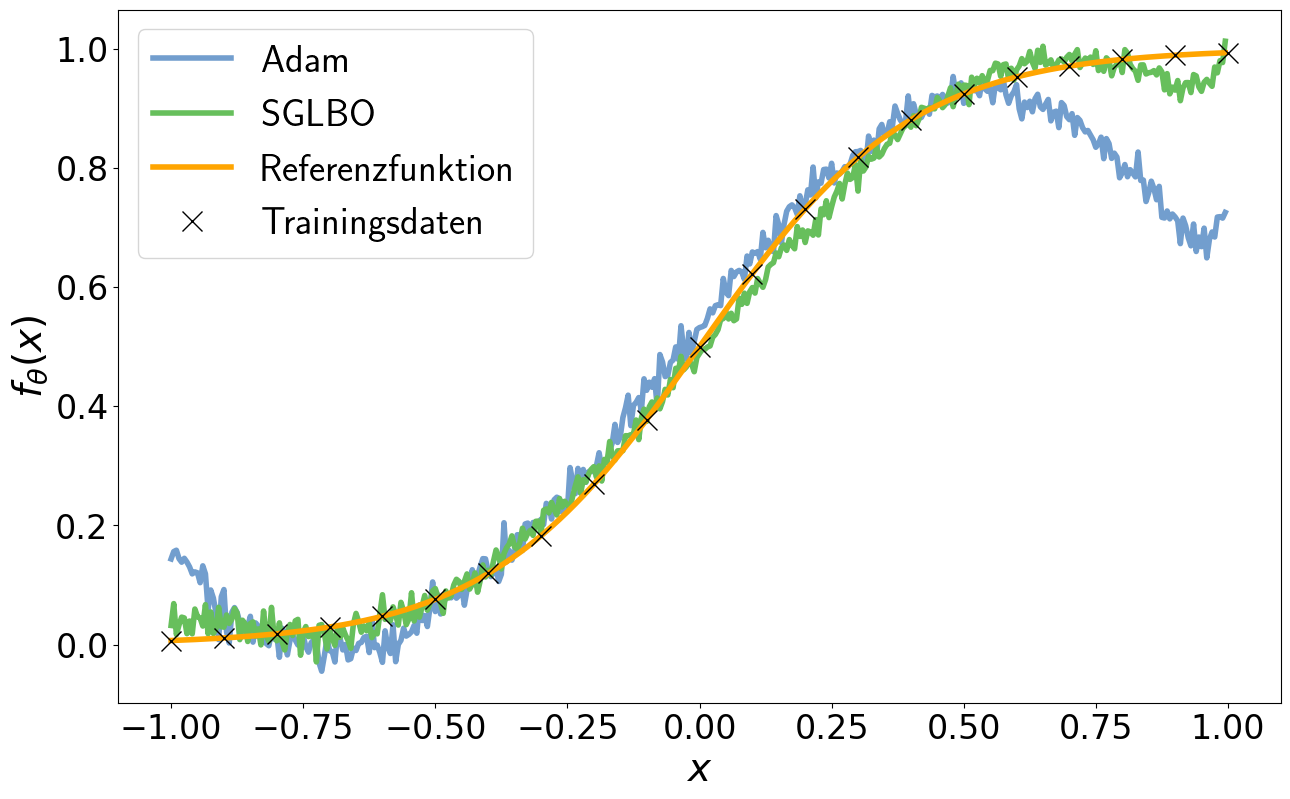

In [7]:
x = np.arange(np.min(x_train), np.max(x_train), 0.005)
y_adam = qnn_simulator_adam.predict(x)
y_sglbo = qnn_simulator_sglbo.predict(x)

plt.rc('text', usetex=False)
plt.figure(figsize=(15, 9))
plt.plot(x, y_adam, label="Adam", linewidth=4, color="#729ECE")
plt.plot(x, y_sglbo, label="SGLBO", linewidth=4, color="#67BF5C")
plt.plot(x, sigmoid(x,5,0,1), label="Referenzfunktion", linewidth=4, color="orange")
plt.plot(x_train, sigmoid(x_train,5,0,1), marker="x", color="black", label="Trainingsdaten", linestyle=" ", markersize=14)

plt.rc('text', usetex=True)

#plt.title(r'$f(x) = \frac{1}{1 + \exp(-5x)}$', fontsize=34)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'$f_{\theta}(x)$', fontsize=28)
plt.legend(fontsize=28)

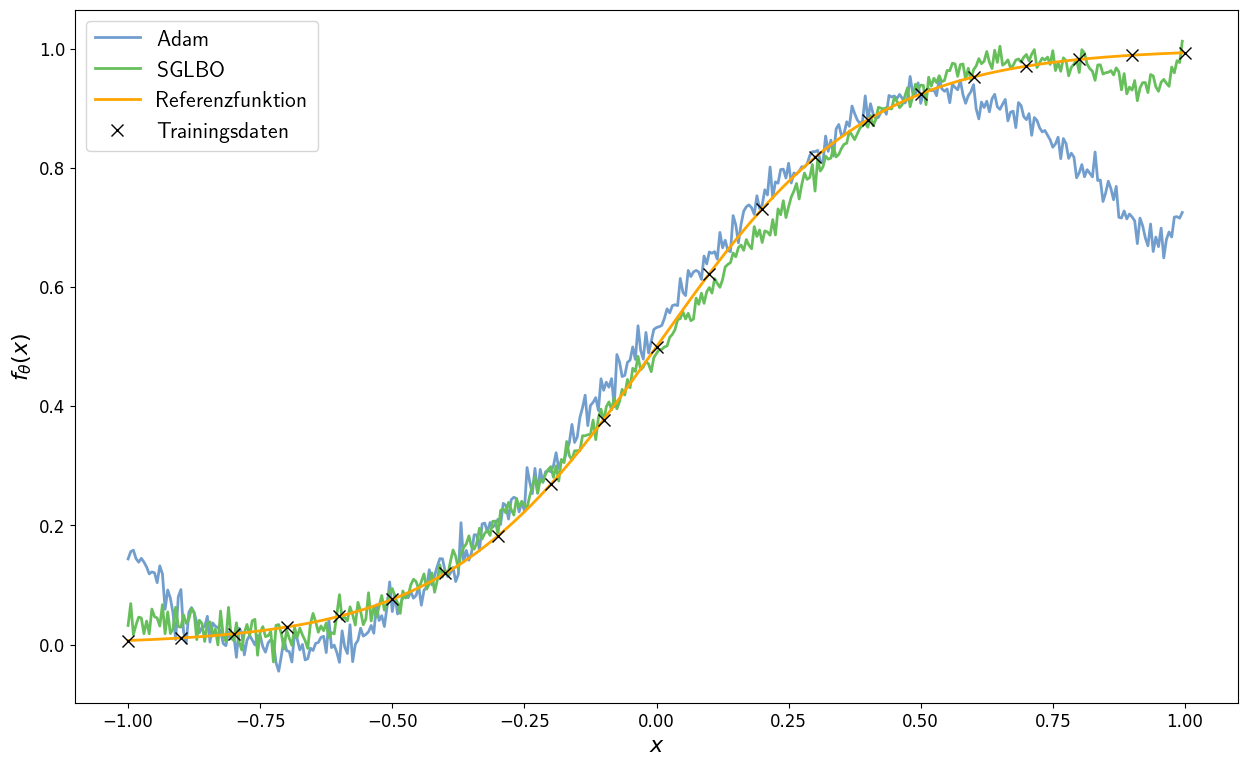

In [8]:

plt.rc('text', usetex=False)

plt.figure(figsize=(15, 9))
plt.plot(x, y_adam, label="Adam", linewidth=2, color="#729ECE")
plt.plot(x, y_sglbo, label="SGLBO", linewidth=2, color="#67BF5C")
plt.plot(x, sigmoid(x,5,0,1), label="Referenzfunktion", linewidth=2, color="orange")
plt.plot(x_train, sigmoid(x_train,5,0,1), marker="x", color="black", label="Trainingsdaten", linestyle=" ", markersize=8)

plt.rc('text', usetex=True)

#plt.title(r'$f(x) = \frac{1}{1 + \exp(-5x)}$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$f_{\theta}(x)$', fontsize=16)
plt.legend(fontsize=16)